<a href="https://colab.research.google.com/github/Gus-1003/Projeto_PalmaS/blob/main/Projeto_Segmentado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas:

In [1]:
'''importando a biblioteca Pandas -> usada para análise e manipulação de dados.'''
import pandas as pd

'''importando a biblioteca NumPy -> usada para trabalhar com matrizes e operações matemáticas.'''
import numpy as np

'''importando a biblioteca Matplotlib -> usada para criar visualizações de dados.'''
import matplotlib.pyplot as plt

'''importando a biblioteca OpenCV, uma biblioteca de código aberto -> amplamente utilizada para processamento de imagens.'''
import cv2 as cv

'''importando a classe KMeans da biblioteca Scikit-Learn, que é usada para realizar a clusterização de dados. 
A clusterização é uma técnica de aprendizado não supervisionado que agrupa dados semelhantes em clusters.'''
from sklearn.cluster import KMeans

'''importando a função cv2_imshow do Google Colab, que é usada para exibir imagens dentro do ambiente de notebook.'''
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lendo Imagem:

In [36]:
file = '/content/drive/MyDrive/Pesquisa_Cochonilha/Base_Imagens/Editadas_Cortadas/editada_90_B1.jpeg_quadrante_3_2.jpg'

im = cv.imread(file)

# Análise clinica da Imagem:

## Visualizando:

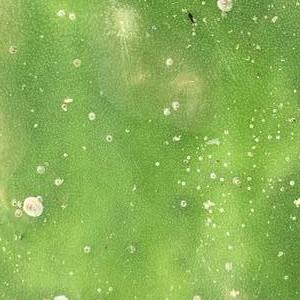

In [37]:
cv2_imshow(im)

## dimenssões:

In [38]:
# Instrução para descobrir o tamanho da dimensão da imagem (Linhas x Colunas)
print('Dim:' + str(im.shape))

Dim:(300, 300, 3)


# Pré Processamento:

## Clonando Imagem (Futura Comparação):



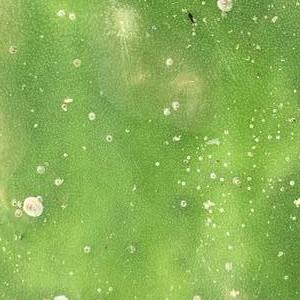

In [39]:
# cria uma cópia da imagem im e armazena na variável compara
compara = im.copy()

# exibe a imagem
cv2_imshow(compara)

## Split dos canais da imagem:

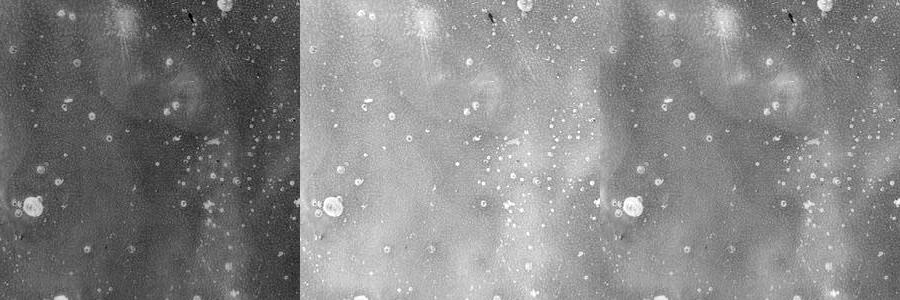

In [40]:
# separa uma imagem em seus canais de cor individuais (B, G, R)
im_split_channels = cv.split(im)

# realiza a mesma operação de separação de canais de cor em BGR e atribui cada canal de cor a uma variável correspondente
(b, g, r) = cv.split(im)

'''une os canais de cor R, G e B em uma única imagem utilizando a função cv.hconcat() da biblioteca OpenCV. A imagem resultante é 
exibida em uma janela utilizando a função cv2_imshow()'''
cv2_imshow(cv.hconcat([b, g, r]))

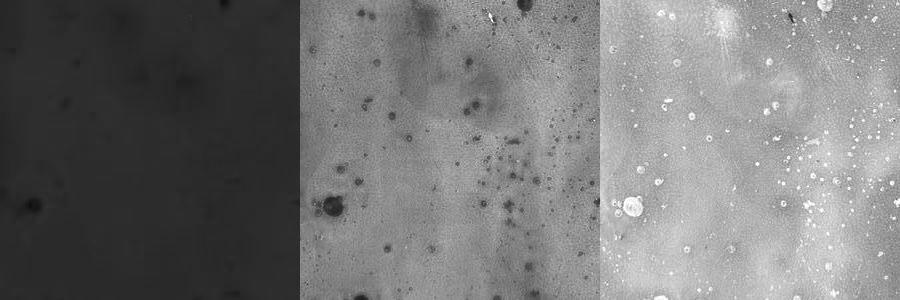

In [41]:
# Converte a imagem para o espaço de cor HSV
hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)

# Separa os canais de cor H, S e V
(h, s, v) = cv.split(hsv)

'''une os canais de cor R, G e B em uma única imagem utilizando a função cv.hconcat() da biblioteca OpenCV. A imagem resultante é 
exibida em uma janela utilizando a função cv2_imshow()'''
cv2_imshow(cv.hconcat([h, s, v]))

## Histograma das cores:

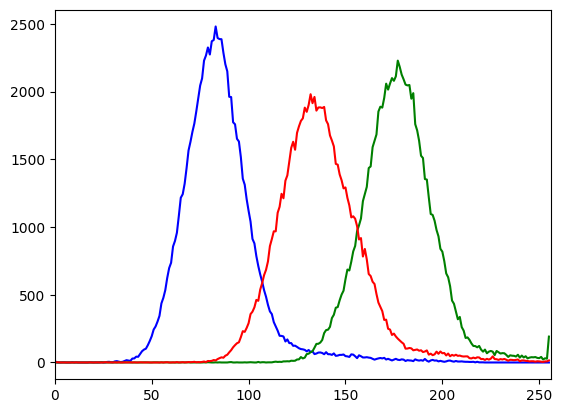

In [42]:
# define o número de bins do histograma
hist_size = 256

# define a faixa de valores de cada canal de cor (0 a 255)
hist_range = (0, 256)

# define se o histograma deve ser acumulado ou não
accumulate = False

# define a ordem de cores para os canais de cor (BGR)
color = ('b','g','r')

# para cada canal de cor, calcula e exibe o histograma
for i, col in enumerate(color):
    # calcula o histograma para o canal de cor atual
    histr = cv.calcHist(im_split_channels, [i], None, [hist_size], hist_range, accumulate=accumulate)
    # exibe o histograma no gráfico
    plt.plot(histr, color=col)
    # define o limite do eixo x do gráfico
    plt.xlim([0, 256])

# exibe o gráfico com os histogramas de cada canal de cor
plt.show()

## Threshold:

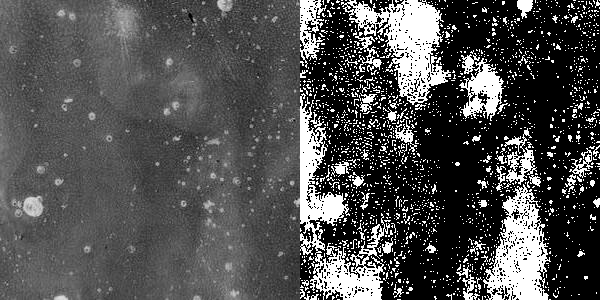

In [43]:
thresh1, im_bin_rgb = cv.threshold(b, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
cv2_imshow(cv.hconcat([b, im_bin_rgb]))

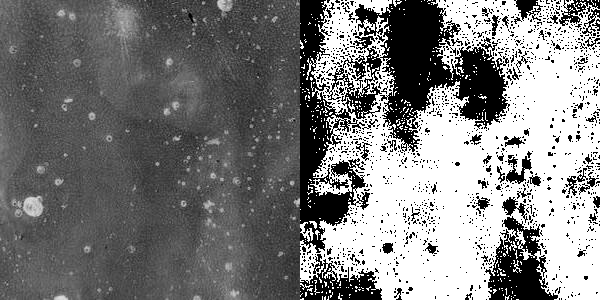

In [45]:
# Aplica um limiar na imagem do canal S
thresh2, im_bin_hsv = cv.threshold(s, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
cv2_imshow(cv.hconcat([b, im_bin_hsv]))

O código ***ret, thresh = cv.threshold(Azul, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)*** realiza uma binarização da imagem Azul utilizando o método de Otsu. A binarização é feita ao converter as intensidades de cor da imagem em valores binários (0 ou 255) com base em um limiar.

> A função cv.threshold() da biblioteca OpenCV é usada para definir esse limiar e binarizar a imagem. Os argumentos da função são:

* Azul: a imagem a ser binarizada.
* 0: o valor do limiar.
* 255: o valor máximo atribuído aos pixels da imagem binarizada.
* cv.THRESH_BINARY + cv.THRESH_OTSU: uma combinação de dois métodos de limiarização. 
    * O método **cv.THRESH_BINARY** define que os valores abaixo do limiar serão definidos como 0 e os valores acima do limiar serão definidos como 255.     
    * O método **cv.THRESH_OTSU** aplica o método de Otsu para definir o limiar de forma adaptativa.

O resultado da binarização é armazenado na variável thresh. O valor de retorno ret é o valor do limiar calculado pelo método de Otsu.

Por fim, cv2_imshow(thresh) exibe a imagem binarizada em uma janela utilizando a função cv2_imshow() da biblioteca OpenCV.

In [46]:
print(thresh1)
print(thresh2)

91.0
129.0


## Remoção de Ruido (HSV):

In [47]:
# Realiza uma operação de abertura para remover ruídos e pequenas regiões
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
im_open = cv.morphologyEx(im_bin_hsv, cv.MORPH_OPEN, kernel)

## Buscando Contornos:

In [48]:
#contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours1, hierarchy = cv.findContours(im_bin_rgb, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [49]:
# Encontra os contornos dos objetos segmentados
contours2, hierarchy = cv.findContours(im_open, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

O código **contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)** encontra os contornos de uma imagem binarizada thresh utilizando a função ***cv.findContours()*** da biblioteca OpenCV.

Os argumentos da função são:

* thresh: a imagem binarizada.
* cv.RETR_EXTERNAL: o modo de recuperação dos contornos. Este modo encontra apenas os contornos externos, descartando os contornos internos.
* cv.CHAIN_APPROX_SIMPLE: o método de aproximação de contornos. Este método aproxima as regiões dos contornos por um conjunto mínimo de pontos, economizando memória.

A função retorna uma lista de contornos encontrados na imagem, armazenada na variável contours, e a hierarquia de contornos, armazenada na variável hierarchy. A hierarquia é útil para identificar a relação entre os contornos, como contornos pais e filhos.

O modo de recuperação e o método de aproximação de contornos podem ser ajustados de acordo com a aplicação específica. Por exemplo, cv.RETR_TREE pode ser usado para recuperar todos os contornos com uma hierarquia completa e cv.CHAIN_APPROX_NONE pode ser usado para armazenar todos os pontos ao longo dos contornos.

## Retirando dados dos contornos:

In [50]:
rows, columns = im_bin_rgb.shape
areaImagem = rows*columns

print('Dimensões da imagem:' + str(im_bin_rgb.shape))
print("Rows = ",rows)
print("Columns = ", columns)

Dimensões da imagem:(300, 300)
Rows =  300
Columns =  300


O código **"rows, columns = thresh.shape"** obtém o número de linhas e colunas da imagem binarizada thresh e armazena esses valores nas variáveis rows e columns, respectivamente. A função **"thresh.shape"** retorna uma tupla com as dimensões da imagem, em que o primeiro elemento é o número de linhas e o segundo elemento é o número de colunas.

A seguir, o código **"areaImagem = rows*columns"** calcula a área total da imagem binarizada multiplicando o número de linhas (rows) pelo número de colunas (columns).

Por fim, o código **"print('Dimensões da imagem:' + str(thresh.shape))"** exibe uma mensagem na tela informando as dimensões da imagem binarizada, enquanto print("Rows = ",rows) e print("Columns = ", columns) exibem o número de linhas e colunas da imagem binarizada, respectivamente. A função str() é usada para converter a tupla de dimensões em uma string para ser exibida na mensagem.

In [51]:
# Inicializa a variável areaOcupada como zero
areaOcupada = 0

# Loop sobre a lista de contornos encontrados na imagem binarizada
for qtd in range(len(contours1)):
    # Calcula a área correspondente ao contorno atual e adiciona à variável areaOcupada
    atual = cv.contourArea(contours1[qtd])
    areaOcupada = areaOcupada + atual

# Exibe algumas informações relevantes na tela
print("areaImagem = ", areaImagem)  # Exibe a área total da imagem binarizada
print('Foram encontrados ' + str(len(contours1)) + ' objetos com seus contornos')  # Exibe a quantidade de objetos encontrados
print('Area total ocupada: ' + str(areaOcupada))  # Exibe a área total ocupada pelos objetos
print('Relação infestação/área total: ' + str((areaOcupada/(rows*columns))*100) + ' %')  # Exibe a relação entre a área ocupada pelos objetos e a área total da imagem binarizada

areaImagem =  90000
Foram encontrados 1989 objetos com seus contornos
Area total ocupada: 20806.5
Relação infestação/área total: 23.118333333333332 %


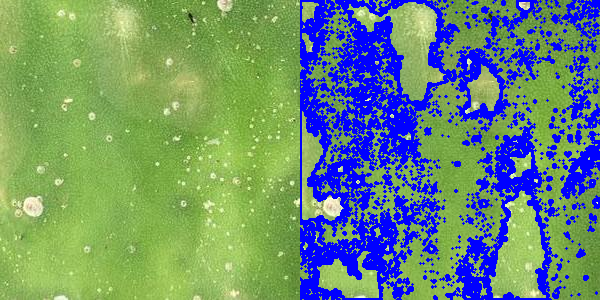

In [52]:
# Desenha os contornos encontrados na imagem original
cv.drawContours(im, contours1, -1, (255,0,0), 2)  # Desenha os contornos em cor magenta com largura de linha 2 pixels
cv2_imshow(cv.hconcat([compara, im]))  # Exibe a imagem original com os contornos desenhados

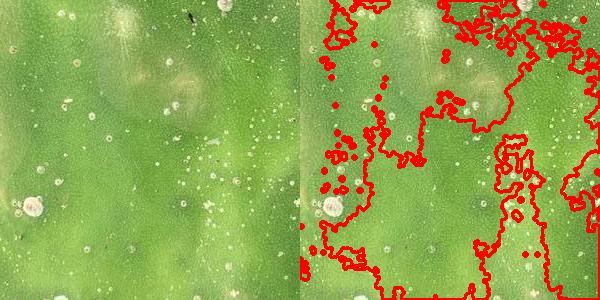

In [53]:
img_hsv = compara.copy()

# Desenha os contornos dos objetos segmentados na imagem original
cv.drawContours(img_hsv, contours2, -1, (0, 0, 255), 2)
cv2_imshow(cv.hconcat([compara, img_hsv]))  # Exibe a imagem original com os contornos desenhados

## Função para crição da mascara:

In [54]:
def extract_image(thresh, cnt):
  # Cria uma imagem em branco com as mesmas dimensões da imagem original
  im_blank = np.zeros(im.shape, np.uint8) 

  # Desenha o contorno especificado na imagem em branco
  cv.drawContours(im_blank, [cnt], -1, 255, -1)

  # Cria uma máscara que corresponde aos pixels dentro do contorno
  mask = im_blank == 255

  # Aplica a máscara na imagem original para obter apenas os pixels dentro do contorno
  im_filter = im[mask]

  # Retorna a nova imagem
  return im_filter

## Desenvolvendo estruturas de dados - Armazenamento das features:

In [55]:
areas = [] # Armazena a área de cada objeto
perimeters = [] # Armazena o perímetro de cada objeto
centroids_x = [] # Armazena as coordenadas x do centróide de cada objeto
centroids_y = [] # Armazena as coordenadas y do centróide de cada objeto
aspect_ratio = [] # Armazena a relação entre largura e altura do retângulo de contorno de cada objeto
extent = [] # Armazena a razão entre a área do contorno e a área do retângulo de contorno de cada objeto
solidity = [] # Armazena a razão entre a área do contorno e a área do casco convexo de cada objeto
equivalent_diameter = [] # Armazena o diâmetro equivalente (em pixels) do círculo com a mesma área de cada objeto

# r_mean, r_min, r_max e r_std: armazenarão a média, o mínimo, o máximo e o desvio padrão dos valores do canal vermelho (R) de cada objeto encontrado na imagem.
r_mean = []
r_min = []
r_max = []
r_std = []

# g_mean, g_min, g_max e g_std: armazenarão a média, o mínimo, o máximo e o desvio padrão dos valores do canal verde (G) de cada objeto encontrado na imagem.
g_mean = []
g_min = []
g_max = []
g_std = []

# b_mean, b_min, b_max e b_std: armazenarão a média, o mínimo, o máximo e o desvio padrão dos valores do canal azul (B) de cada objeto encontrado na imagem.
b_mean = []
b_min = []
b_max = []
b_std = []

width = [] # Armazena a largura do retângulo de contorno de cada objeto
height = [] # Armazena a altura do retângulo de contorno de cada objeto
angle = [] # Armazena o ângulo (em graus) do retângulo de contorno de cada objeto
radius = [] # Armazena o raio do círculo de contorno de cada objeto

## Coletando os dados a partir dos contornos:

In [56]:
# Para cada contorno da lista de contornos:
for c in contours1:

  # Momentos do objeto
  M = cv.moments(c)
  
  # Área do objeto
  areas.append(M['m00'])
  
  # Perímetro do objeto
  perimeters.append(cv.arcLength(c,True)) #if not convex, False
  
  # Proporção de aspecto do objeto
  x,y,w,h = cv.boundingRect(c)
  aspect_ratio.append(float(w)/h)
  width.append(w)
  height.append(h)
  
  # Ângulo e raio mínimo envolvente em torno do objeto
  rect = cv.minAreaRect(c)
  circle = cv.minEnclosingCircle(c)
  angle.append(rect[2])
  radius.append(circle[1])
  
  # Extensão do objeto (razão entre a área do objeto e a área do retângulo envolvente mínimo)
  rect_area = w*h
  if rect_area > 0:
      extent.append(M['m00']/rect_area)
  else: 
      extent.append(0)
  
  # Solidez do objeto (razão entre a área do objeto e a área de seu casco convexo)
  hull = cv.convexHull(c)
  hull_area = cv.contourArea(hull)
  if hull_area > 0:
      solidity.append(M['m00']/hull_area)
  else:
      solidity.append(0)
  
  # Diâmetro equivalente do objeto (diâmetro do círculo cuja área é a mesma da área do objeto)
  equivalent_diameter = np.sqrt(4*M['m00']/np.pi)
  
  # Cálculo das coordenadas do centroide do objeto
  if M['m00'] != 0:
      centroids_x.append(M['m10']/M['m00'])
      centroids_y.append(M['m01']/M['m00'])
  else:
      centroids_x.append(0)
      centroids_y.append(0)
      
  # Extração das informações de cor do objeto nas bandas R, G e B
  r = extract_image(im_split_channels[2], c)
  g = extract_image(im_split_channels[1], c)
  b = extract_image(im_split_channels[0], c)
  
  # Cálculo das estatísticas de cor para as bandas R, G e B
  # Canal vermelho:
  r_mean.append(np.mean(r))
  r_max.append(np.max(r))
  r_min.append(np.min(r))
  r_std.append(np.std(r))

  # Canal verde:
  g_mean.append(np.mean(g))
  g_max.append(np.max(g))
  g_min.append(np.min(g))
  g_std.append(np.std(g))

  # Canal Azul:
  b_mean.append(np.mean(b))
  b_max.append(np.max(b))
  b_min.append(np.min(b))
  b_std.append(np.std(b))


## Agrupamentos de Features:

In [57]:
# features_1 = {'area': areas, 'perimiter': perimeters, 'aspect_ratio': aspect_ratio, 
#             'extent': extent, 'solidity': solidity, 'equivalent_diameter': equivalent_diameter,
#             'r_mean': r_mean, 'r_max': r_max, 'r_min': r_min, 'r_std': r_std,
#             'g_mean': g_mean, 'g_max': g_max, 'g_min': g_min, 'g_std': g_std,
#             'b_mean': b_mean, 'b_max': b_max, 'b_min': b_min, 'b_std': b_std,
#             'width': width, 'height': height, 'angle': angle, 'radius': radius
# }

# features_2 = {'area': areas, 'perimiter': perimeters, 'aspect_ratio': aspect_ratio, 
#             'extent': extent, 'solidity': solidity, 'equivalent_diameter': equivalent_diameter
# }

features_3 = {'r_mean': r_mean, 'r_max': r_max, 'r_min': r_min, 'r_std': r_std,
            'g_mean': g_mean, 'g_max': g_max, 'g_min': g_min, 'g_std': g_std,
            'b_mean': b_mean, 'b_max': b_max, 'b_min': b_min, 'b_std': b_std
}

# features_4 = {'r_mean': r_mean, 'g_mean': g_mean, 'b_mean': b_mean}

# features_5 = {'r_mean': r_mean, 'g_mean': g_mean, 'b_mean': b_mean,
#              'area': areas, 'perimiter': perimeters, 'aspect_ratio': aspect_ratio, 
#              'extent': extent, 'solidity': solidity, 'equivalent_diameter': equivalent_diameter
# }

features_6 = {'r_mean': r_mean, 'r_max': r_max, 'r_min': r_min, 'r_std': r_std,
            'g_mean': g_mean, 'g_max': g_max, 'g_min': g_min, 'g_std': g_std,
            'b_mean': b_mean, 'b_max': b_max, 'b_min': b_min, 'b_std': b_std,
            'area': areas, 'perimiter': perimeters, 'aspect_ratio': aspect_ratio, 
            'extent': extent, 'solidity': solidity, 'equivalent_diameter': equivalent_diameter
}

# features_7 = {'r_mean': r_mean, 'r_max': r_max, 'r_min': r_min, 'r_std': r_std,
#             'g_mean': g_mean, 'g_max': g_max, 'g_min': g_min, 'g_std': g_std,
#             'b_mean': b_mean, 'b_max': b_max, 'b_min': b_min, 'b_std': b_std,
#              'extent': extent, 'solidity': solidity 
# }

# features_8 = {'r_mean': r_mean, 'r_max': r_max, 'r_min': r_min, 'r_std': r_std,
#             'g_mean': g_mean, 'g_max': g_max, 'g_min': g_min, 'g_std': g_std,
#             'b_mean': b_mean, 'b_max': b_max, 'b_min': b_min, 'b_std': b_std,
#              'extent': extent, 'equivalent_diameter': equivalent_diameter, 'perimiter': perimeters
# }

# features_9 = {'r_mean': r_mean, 'r_max': r_max, 'r_min': r_min, 'r_std': r_std,
#             'g_mean': g_mean, 'g_max': g_max, 'g_min': g_min, 'g_std': g_std,
#             'b_mean': b_mean, 'b_max': b_max, 'b_min': b_min, 'b_std': b_std,
#              'solidity': solidity , 'equivalent_diameter': equivalent_diameter 
# }

# features_10 = {'r_max': r_max, 'g_max': g_max, 'b_max': b_max,
#              'solidity': solidity , 'equivalent_diameter': equivalent_diameter 
# }

# features_11 = {'r_max': r_max, 'g_max': g_max, 'b_max': b_max,
#                'r_min': r_min, 'g_min': g_min, 'b_min': b_min,
#              'solidity': solidity , 'equivalent_diameter': equivalent_diameter 
# }

# Processamento:

In [58]:
df = pd.DataFrame(features_6)
df

,r_mean,r_max,r_min,r_std,g_mean,g_max,g_min,g_std,b_mean,b_max,b_min,b_std,area,perimiter,aspect_ratio,extent,solidity,equivalent_diameter
0,255.000000,255,255,0.000000,255.000000,255,255,0.000000,255.000000,255,255,0.000000,0.0,2.000000,2.000000,0.000000,0.000000,31.382332
1,255.000000,255,255,0.000000,255.000000,255,255,0.000000,255.000000,255,255,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,31.382332
2,255.000000,255,255,0.000000,255.000000,255,255,0.000000,255.000000,255,255,0.000000,0.0,2.000000,2.000000,0.000000,0.000000,31.382332
3,255.000000,255,255,0.000000,255.000000,255,255,0.000000,255.000000,255,255,0.000000,0.0,6.000000,4.000000,0.000000,0.000000,31.382332
4,255.000000,255,255,0.000000,255.000000,255,255,0.000000,255.000000,255,255,0.000000,0.0,4.000000,3.000000,0.000000,0.000000,31.382332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,255.000000,255,255,0.000000,255.000000,255,255,0.000000,255.000000,255,255,0.000000,0.0,2.000000,2.000000,0.000000,0.000000,31.382332
1985,255.000000,255,255,0.000000,255.000000,255,255,0.000000,255.000000,255,255,0.000000,3.5,8.242641,1.333333,0.291667,0.875000,31.382332
1986,255.000000,255,255,0.000000,255.000000,255,255,0.000000,255.000000,255,255,0.000000,2.5,7.414214,1.000000,0.277778,0.833333,31.382332
1987,255.000000,255,255,0.000000,255.000000,255,255,0.000000,255.000000,255,255,0.000000,1.0,8.828427,0.400000,0.100000,0.500000,31.382332


In [59]:
df.describe()

,r_mean,r_max,r_min,r_std,g_mean,g_max,g_min,g_std,b_mean,b_max,b_min,b_std,area,perimiter,aspect_ratio,extent,solidity,equivalent_diameter
count,1989.000000,1989.0,1989.000000,1989.000000,1989.000000,1989.0,1989.000000,1989.000000,1989.000000,1989.0,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03
mean,254.557403,255.0,252.949221,0.600253,254.557403,255.0,252.949221,0.600253,254.557403,255.0,252.949221,0.600253,10.460784,7.176489,1.075456,0.060188,0.227521,3.138233e+01
std,5.497698,0.0,18.497592,5.687574,5.497698,0.0,18.497592,5.687574,5.497698,0.0,18.497592,5.687574,175.173956,44.492743,0.528901,0.106236,0.374642,1.066082e-14
min,137.875417,255.0,36.000000,0.000000,137.875417,255.0,36.000000,0.000000,137.875417,255.0,36.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,3.138233e+01
25%,255.000000,255.0,255.000000,0.000000,255.000000,255.0,255.000000,0.000000,255.000000,255.0,255.000000,0.000000,0.000000,0.000000,0.833333,0.000000,0.000000,3.138233e+01
50%,255.000000,255.0,255.000000,0.000000,255.000000,255.0,255.000000,0.000000,255.000000,255.0,255.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.138233e+01
75%,255.000000,255.0,255.000000,0.000000,255.000000,255.0,255.000000,0.000000,255.000000,255.0,255.000000,0.000000,0.500000,5.414214,1.000000,0.125000,0.428571,3.138233e+01
max,255.000000,255.0,255.000000,77.332996,255.000000,255.0,255.000000,77.332996,255.000000,255.0,255.000000,77.332996,4885.000000,965.962545,5.000000,0.571691,1.000000,3.138233e+01


## Kmeans:

In [60]:
# n_clusters: Define o número de clusters:
n_clusters = 3

# Inicializando o KMeans com os parâmetros necessários
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, algorithm='full') #auto, full, elkan

# Aplica o KMeans ao dataframe de características previamente criado
kmeans.fit(df) # Metodo fit

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', n_clusters=3, n_init=10)

Nesse trecho de código, estamos definindo o número de clusters desejado (n_clusters = 3) e, em seguida, criando um objeto KMeans com esse número de clusters **"(kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, algorithm='full'))"**.

Os parâmetros init, n_init e algorithm são definidos para inicialização do centróide. 
> O valor **k-means++** no parâmetro init é uma técnica de inicialização que seleciona de forma inteligente os centróides iniciais de tal forma que os clusters sejam iniciados com uma distância razoável entre eles.

> O **n_init** especifica o número de vezes que o algoritmo k-means será executado com diferentes centróides iniciais. 

> O parâmetro **algorithm** especifica a técnica utilizada para computação dos clusters.

Finalmente, estamos aplicando o algoritmo KMeans aos dados (kmeans.fit(df)) para computar os centróides dos clusters e atribuir cada observação ao seu respectivo cluster.

In [61]:
im2 = compara.copy()

# Lista vazia conts para armazenar os contornos agrupados por classes
conts = [[],[],[],[]] #contour list

# Loop através dos contornos e prevê sua classe utilizando KMeans.predict
for cont, cnt in enumerate(contours1):
  # Adiciona o contorno na lista correspondente à sua classe
  class_ = kmeans.predict([df.iloc[cont]])[0]
  conts[class_].append(cnt)

# Desenha os contornos agrupados por classe na imagem   
if n_clusters == 3:
    im2 = cv.drawContours(im2, conts[0], -1, (255, 0, 0), thickness=2) # Azul
    im2 = cv.drawContours(im2, conts[1], -1, (0, 255, 0), thickness=2) # Laranja
    im2 = cv.drawContours(im2, conts[2], -1, (0, 0, 255), thickness=2) # Verde
elif n_clusters == 2:
    im2 = cv.drawContours(im2, conts[0], -1, (255, 255, 0), thickness=2)
    im2 = cv.drawContours(im2, conts[1], -1, (0, 255, 255), thickness=2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  w

#  Resultado:

## Clusters:

O numero de cluster escolhido foi: 3

class 0: 1984 individuals
class 1: 2 individuals
class 2: 3 individuals
class 3: 0 individuals


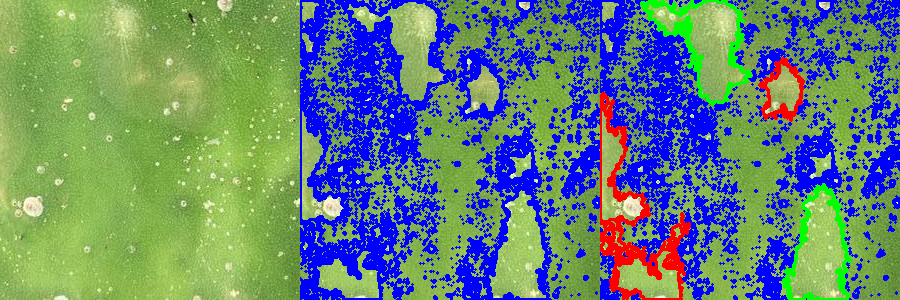

In [62]:
print("O numero de cluster escolhido foi: " + str(n_clusters))
print()
print('class 0: ' + str(len(conts[0])) + ' individuals')
print('class 1: ' + str(len(conts[1])) + ' individuals')
print('class 2: ' + str(len(conts[2])) + ' individuals')
print('class 3: ' + str(len(conts[3])) + ' individuals')

cv2_imshow(cv.hconcat([compara, im, im2]))